<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/tanisha/formula1_mini_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')


In [5]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


fatal: destination path 'forumla1-mini-sprint' already exists and is not an empty directory.


#**Team 19:**


##*Hypothesis:*
By analyzing the historical performance data of Formula 1 teams, we can identify key factors that contribute to good performance and recommend specific strategies for the worst-performing team to improve their race results.

Factors such as pit stop, qaulify times, grid position

##*Initial Data Exploration:*

- Heatmap to show correlation

- Aggregating pit stop times

- Ranking of Teams with quickest pit stops

- Ranking of Teams lowest grid position






#**Formula 1 Data Definitions:**

###circuits.csv

column name  | definition
-------------------|------------------
**circuitId**      | (key)Id
**cicruitRef**     | Reference name of circuit
   **name**        | Actual name of circuit
 **location**      | City
**country**        | Country
**lat**            | Latitude
**lng**            | Longitude
**alt**            | Altitude
**url**            | Wikipedia URL

A circuit refers to the track or racing venue where Formula 1 races take place.

###constructors.csv

column name  | definition
-------------------|------------------
**constructorId**      | (key)Id
**constructorRef**     | Reference name of constructor
   **name**        | Actual name of constructor
 **nationality**      | Country
**url**        | Wikipedia URL

A constructor refers to a team that is responsible for the overall design and development of their Formula 1 car. Formula 1 has seen a stable number of teams participating in each season, typically ranging from 10 to 12 constructors.

###constructors_standings.csv

column name  | definition
-------------------|------------------
**constructorStandingsId**  | (key)Id
**raceId**    | Id of race
   **constructorId**        | Id of constructor
 **points**      | Points scored
**positions**        | Final position
**positionText** | Final position in text
**wins** | Number of wins

The constructor standings are determined by adding up the total points earned by each team throughout the season. The team with the highest cumulative points at the end of the season is declared the Constructors' Champion.

###constructors_results.csv

column name  | definition
-------------------|------------------
**constructorResultsId**  | (key)Id
**raceId**    | Id of race
**constructorId**        | Id of constructor
 **points**      | Points scored
**status**        | Status of results


###drivers.csv

column name  | definition
-------------------|------------------
**driverId**  | (key)Id
**driverRed**    | Reference name of driver
**number**        | Driver number
 **code**      | 3-letter alphabet code of driver
**forename**        | First name
**surname** | Last name
**dob** | Date of birth
**nationality** | Country
**url** | Wikipedia URL

In a Formula 1 season, there are typically 20 drivers representing 10 teams (constructors) on the grid.

###drivers_standings.csv

column name  | definition
-------------------|------------------
**driverStandingsId**  | (key)Id
**raceId**    | Id of race
**driverId**        | Id of driver
 **points**      | Points
**position**        | Final position
**positionText** | Final position in text
**wins** | Number of wins

Throughout the season drivers accumulate points from each race they compete in. Only drivers in finishing positions 1-10 earn points for a race



###lap_times.csv

column name  | definition
-------------------|------------------
**raceId**    | Id of race
**driverId**        | Id of driver
 **lap**      | Lap number
**position**        | Final position
**time** | Time
**milliseconds** | Time in milliseconds

###pit_stops.csv

column name  | definition
-------------------|------------------
**raceId**    | Id of race
**driverId**        | Id of driver
 **stop**      | Stop number
**lap**        | Lap number
**time** | Time of pit stop
**duration** | Duration of pit stop
**milliseconds** | Time in milliseconds

###qualifying.csv

column name  | definition
-------------------|------------------
**qualifyId** | Id
**raceId**    | Id of race
**driverId**        | Id of driver
 **constructorId**      | Stop number
**number**        | Car number
**postion** | Final position
**q1** | Time in Qualifying Round 1
**q2** | Time in Qualifying Round 2
**q3** | Time in Qualifying Round 3

In Formula 1, qualifying refers to the process by which drivers compete to determine the starting grid positions for the race. Qualifying sessions typically take place on the day before the race, usually on Saturday. Q1 all drivers participate, Q2 the remaining drivers participate, Q3 top ten drivers compete for best grid position.

###races.csv

column name  | definition
-------------------|------------------
**raceId**    | Id of race
**year**        | Id of driver
 **round**      | Race number
**circuitId**        | Id of circuit
**name** | Name of circuit
**date** | Date
**time** | Time
**url** | Wikipedia URL
**fp1_date** | Free Practice 1, session takes place on Friday during a race weekend
**fp1_time** | Free Practice 1, time

The typical number of races in a Formula 1 season has been around 20 to 23 races.The number of races in a Formula 1 season can vary from one year to the next.

###results.csv

column name  | definition
-------------------|------------------
**results** | Id of results
**raceId**    | Id of race
**driverId**        | Id of driver
 **constructorId**      | Stop number
**number**        | Car number
**grid** | Starting position at the beginning of the race
**postion** | Final position
**positionText** | Final position in text
**positionOrder** | Final rank
**points** | Points
**laps** | Lap number
**time** | Time
**milliseconds** | Time in milliseconds
**fastestLap** | Fastest Lap
**rank** | Standing Rank
**fastestLapTime** | Fastest Lap Time
**fastestLapSpeed** | Fastest Lap Speed
**statusId** | Status

###seasons.csv

column name  | definition
-------------------|------------------
**year**    | Year
**url**        | Wikipedia URL

###sprint_results.csv

column name  | definition
-------------------|------------------
**results** | Id of results
**raceId**    | Id of race
**driverId**        | Id of driver
 **constructorId**      | Stop number
**number**        | Car number
**grid** | Starting position at the beginning of the race
**postion** | Final position
**positionText** | Final position in text
**positionOrder** | Final rank
**points** | Points
**laps** | Lap number
**time** | Time
**milliseconds** | Time in milliseconds
**fastestLap** | Fastest Lap
**rank** | Standing Rank
**fastestLapTime** | Fastest Lap Time
**fastestLapSpeed** | Fastest Lap Speed
**statusId** | Status

###status.csv

column name  | definition
-------------------|------------------
**statusId**    | Id
**status**      | Commentary notes on actions that occurred during race

# **Import libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
%matplotlib inline

# Read in Data

**Read in data**

In [8]:
driver_standings = pd.read_csv('//content/forumla1-mini-sprint/data/driver_standings.csv')
drivers = pd.read_csv('/content/forumla1-mini-sprint/data/drivers.csv')
results = pd.read_csv('/content/forumla1-mini-sprint/data/results.csv')
constructors = pd.read_csv('/content/forumla1-mini-sprint/data/constructors.csv')
constructor_results = pd.read_csv('/content/forumla1-mini-sprint/data/constructor_results.csv')
constructor_standings = pd.read_csv('/content/forumla1-mini-sprint/data/constructor_standings.csv')
races = pd.read_csv('/content/forumla1-mini-sprint/data/races.csv')
pit_stops = pd.read_csv('/content/forumla1-mini-sprint/data/pit_stops.csv')
qualifying = pd.read_csv('/content/forumla1-mini-sprint/data/qualifying.csv')


# Explore Data

Checking the info of each included data, # of columns, # of rows

In [9]:
driver_standings.info()
driver_standings.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34124 non-null  int64  
 1   raceId             34124 non-null  int64  
 2   driverId           34124 non-null  int64  
 3   points             34124 non-null  float64
 4   position           34124 non-null  int64  
 5   positionText       34124 non-null  object 
 6   wins               34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
5,6,18,6,3.0,6,6,0
6,7,18,7,2.0,7,7,0
7,8,18,8,1.0,8,8,0
8,9,19,1,14.0,1,1,1
9,10,19,2,11.0,3,3,0


In [10]:
driver_standings.describe()

,driverStandingsId,raceId,driverId,points,position,wins
count,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000
mean,42535.650656,572.649396,307.284697,13.489987,19.897169,0.269429
std,21729.601277,284.154765,267.228677,35.599709,16.396017,0.995681
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19649.750000,347.000000,85.000000,0.000000,8.000000,0.000000
50%,49674.500000,595.000000,221.000000,1.000000,16.000000,0.000000
75%,58946.250000,797.000000,509.000000,10.000000,26.000000,0.000000
max,72187.000000,1110.000000,858.000000,454.000000,108.000000,15.000000


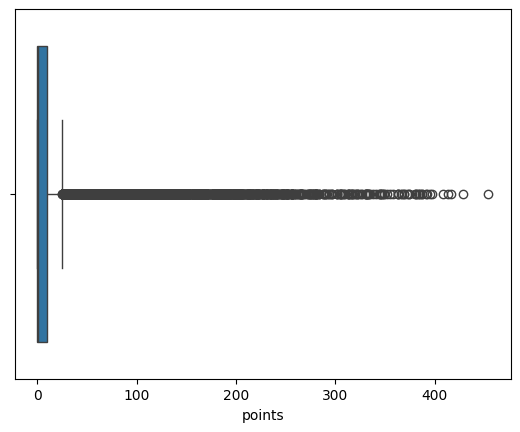

In [11]:
sns.boxplot(x=driver_standings['points'])
plt.show()


Driver Standings is culmative contains outliers

In [12]:
drivers.info()
drivers.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [13]:
results.info()
results.head(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

,0,1,2,3,4
resultId,1,2,3,4,5
raceId,18,18,18,18,18
driverId,1,2,3,4,5
constructorId,1,2,3,4,1
number,22,3,7,5,23
grid,1,5,7,11,3
position,1,2,3,4,5
positionText,1,2,3,4,5
positionOrder,1,2,3,4,5
points,10.0,8.0,6.0,5.0,4.0


In [14]:
results.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


from matplotlib import pyplot as plt
_df_0['resultId'].plot(kind='hist', bins=20, title='resultId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['raceId'].plot(kind='hist', bins=20, title='raceId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['driverId'].plot(kind='hist', bins=20, title='driverId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['constructorId'].plot(kind='hist', bins=20, title='constructorId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='resultId', y='raceId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='raceId', y='driverId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='driverId', y='constructorId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='constructorId', y='grid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['resultId'].plot(kind='line', figsize=(8, 4), title='resultId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['raceId'].plot(kind='line', figsize=(8, 4), title='raceId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['driverId'].plot(kind='line', figsize=(8, 4), title='driverId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['constructorId'].plot(kind='line', figsize=(8, 4), title='constructorId')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
constructors.info()
constructors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [17]:
constructor_results.info()
constructor_results.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12290 entries, 0 to 12289
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12290 non-null  int64  
 1   raceId                12290 non-null  int64  
 2   constructorId         12290 non-null  int64  
 3   points                12290 non-null  float64
 4   status                12290 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 480.2+ KB


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [18]:
constructor_standings.info()
constructor_standings.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13051 non-null  int64  
 1   raceId                  13051 non-null  int64  
 2   constructorId           13051 non-null  int64  
 3   points                  13051 non-null  float64
 4   position                13051 non-null  int64  
 5   positionText            13051 non-null  object 
 6   wins                    13051 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 713.9+ KB


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [19]:
races.info()
races.head(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1101 non-null   int64 
 1   year         1101 non-null   int64 
 2   round        1101 non-null   int64 
 3   circuitId    1101 non-null   int64 
 4   name         1101 non-null   object
 5   date         1101 non-null   object
 6   time         1101 non-null   object
 7   url          1101 non-null   object
 8   fp1_date     1101 non-null   object
 9   fp1_time     1101 non-null   object
 10  fp2_date     1101 non-null   object
 11  fp2_time     1101 non-null   object
 12  fp3_date     1101 non-null   object
 13  fp3_time     1101 non-null   object
 14  quali_date   1101 non-null   object
 15  quali_time   1101 non-null   object
 16  sprint_date  1101 non-null   object
 17  sprint_time  1101 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.0+ KB


,0,1,2,3,4
raceId,1,2,3,4,5
year,2009,2009,2009,2009,2009
round,1,2,3,4,5
circuitId,1,2,17,3,4
name,Australian Grand Prix,Malaysian Grand Prix,Chinese Grand Prix,Bahrain Grand Prix,Spanish Grand Prix
date,2009-03-29,2009-04-05,2009-04-19,2009-04-26,2009-05-10
time,06:00:00,09:00:00,07:00:00,12:00:00,12:00:00
url,http://en.wikipedia.org/wiki/2009_Australian_G...,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
fp1_date,\N,\N,\N,\N,\N
fp1_time,\N,\N,\N,\N,\N


In [32]:
races.describe()

,raceId,year,round,circuitId
count,1101.000000,1101.000000,1101.000000,1101.000000
mean,553.355132,1992.020890,8.494096,23.700272
std,321.425790,20.296406,5.081089,19.346014
min,1.000000,1950.000000,1.000000,1.000000
25%,276.000000,1976.000000,4.000000,9.000000
50%,551.000000,1994.000000,8.000000,18.000000
75%,826.000000,2010.000000,12.000000,34.000000
max,1120.000000,2023.000000,22.000000,80.000000


In [20]:
pit_stops.info()
pit_stops.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10089 entries, 0 to 10088
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        10089 non-null  int64 
 1   driverId      10089 non-null  int64 
 2   stop          10089 non-null  int64 
 3   lap           10089 non-null  int64 
 4   time          10089 non-null  object
 5   duration      10089 non-null  object
 6   milliseconds  10089 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 551.9+ KB


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [34]:
pit_stops.describe()

,raceId,driverId,stop,lap,milliseconds
count,10089.000000,10089.000000,10089.000000,10089.000000,1.008900e+04
mean,962.774011,523.998910,1.759738,25.312023,7.534863e+04
std,81.144375,389.698555,0.916282,14.729775,2.788588e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,888.000000,18.000000,1.000000,13.000000,2.191400e+04
50%,958.000000,815.000000,2.000000,25.000000,2.357000e+04
75%,1035.000000,831.000000,2.000000,36.000000,2.620200e+04
max,1110.000000,858.000000,6.000000,78.000000,3.069017e+06


In [21]:
qualifying.info()
qualifying.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9815 non-null   int64 
 1   raceId         9815 non-null   int64 
 2   driverId       9815 non-null   int64 
 3   constructorId  9815 non-null   int64 
 4   number         9815 non-null   int64 
 5   position       9815 non-null   int64 
 6   q1             9807 non-null   object
 7   q2             9651 non-null   object
 8   q3             9488 non-null   object
dtypes: int64(6), object(3)
memory usage: 690.2+ KB


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [22]:
qualifying.describe()

,qualifyId,raceId,driverId,constructorId,number,position
count,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000,9815.000000
mean,4920.076108,589.809985,314.514519,44.783597,18.114519,11.244931
std,2847.637640,421.207023,381.264736,70.843628,17.859565,6.290625
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,2455.500000,119.500000,16.000000,4.000000,7.000000,6.000000
50%,4910.000000,856.000000,50.000000,9.000000,14.000000,11.000000
75%,7383.500000,981.000000,818.000000,28.000000,22.000000,17.000000
max,9872.000000,1110.000000,858.000000,214.000000,99.000000,28.000000


# Clean Data

Identify null values, unique values, duplicates, any outliers

In [66]:
print("Null Values", "\n")
print("driver_standings", "\n")
driver_standings.isnull().sum()


Null Values 

driver_standings 



driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

In [75]:
print("Null Values", "\n")
print("drivers", "\n")
drivers.isnull().sum()


Null Values 

drivers 



driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [73]:
drivers.nunique()


driverId       857
driverRef      857
number          45
code            95
forename       476
surname        798
dob            839
nationality     42
url            857
dtype: int64

In [63]:
print("Null Values", "\n")
print("Results", "\n")
results.isnull().sum()


Null Values 

Results 



resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [64]:
print("Null Values", "\n")
print("Constructor_results", "\n")
constructor_results.isnull().sum()

Null Values 

Constructor_results 



constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64

In [76]:
print("Null Values", "\n")
print("Constructor_standings", "\n")
constructor_standings.isnull().sum()

Null Values 

Constructor_standings 



constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

In [77]:
print("Null Values", "\n")
print("races", "\n")
races.isnull().sum()

Null Values 

races 



raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

In [61]:
for column in results.columns:
    # Count duplicates for the current column
    duplicate_count = results[column].duplicated().sum()
    print(f"Number of duplicates in '{column}': {duplicate_count}")

Number of duplicates in 'resultId': 0
Number of duplicates in 'raceId': 24989
Number of duplicates in 'driverId': 25223
Number of duplicates in 'constructorId': 25870
Number of duplicates in 'number': 25950
Number of duplicates in 'grid': 26045
Number of duplicates in 'position': 26046
Number of duplicates in 'positionText': 26041
Number of duplicates in 'positionOrder': 26041
Number of duplicates in 'points': 26041
Number of duplicates in 'laps': 25908
Number of duplicates in 'time': 19080
Number of duplicates in 'milliseconds': 18867
Number of duplicates in 'fastestLap': 26000
Number of duplicates in 'rank': 26054
Number of duplicates in 'fastestLapTime': 19110
Number of duplicates in 'fastestLapSpeed': 18935
Number of duplicates in 'statusId': 25943


In [65]:
print("Null Values", "\n")
print("pit_stops", "\n")
pit_stops.isnull().sum()


Null Values 

pit_stops 



raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64

In [74]:
print("Null Values", "\n")
print("qualifying", "\n")
qualifying.isnull().sum()



Null Values 

qualifying 



qualifyId          0
raceId             0
driverId           0
constructorId      0
number             0
position           0
q1                 8
q2               164
q3               327
dtype: int64

Null values present in qualifying. Drivers are knocked out each round depending on their times. Drivers are knocked out each round according to the time.

# Analyze

Merge results and drivers

In [79]:
merge_perf = results.merge(drivers, on='driverId')
merge_perf.head().T

,0,1,2,3,4
resultId,1,27,57,69,90
raceId,18,19,20,21,22
driverId,1,1,1,1,1
constructorId,1,1,1,1,1
number_x,22,22,22,22,22
grid,1,9,3,5,3
position,1,5,13,3,2
positionText,1,5,13,3,2
positionOrder,1,5,13,3,2
points,10.0,4.0,0.0,6.0,8.0


StatusId, dob, nationality, url, positionText, number_x, number_y, are not relavant to the hypothesis can be removed.

## Historical Standings

Text(0, 0.5, 'Points')

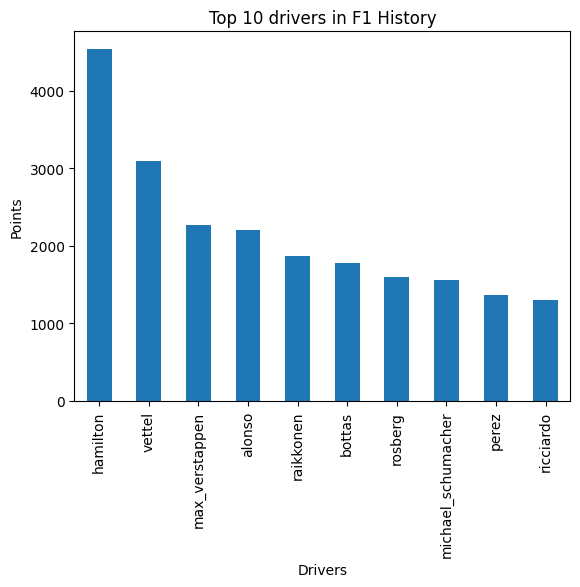

In [94]:
merge_perf.groupby('driverRef')['points'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 drivers in F1 History')
plt.xlabel('Drivers')
plt.ylabel('Points')

In [83]:
print("Top ten drivers career points")
merge_perf.groupby('driverRef')['points'].sum().sort_values(ascending=False).head(10)


Top ten drivers career points


driverRef
hamilton              4540.5
vettel                3098.0
max_verstappen        2275.5
alonso                2203.0
raikkonen             1873.0
bottas                1783.0
rosberg               1594.5
michael_schumacher    1566.0
perez                 1361.0
ricciardo             1307.0
Name: points, dtype: float64

In [85]:
constructor_perf = constructor_standings.merge(constructors, on='constructorId')
constructor_perf.head()


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,7,19,1,24.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,18,20,1,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,29,21,1,34.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,40,22,1,42.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


Top ten constructors


constructorRef
ferrari        91389.0
mercedes       73379.5
red_bull       68243.5
mclaren        57557.5
williams       32147.5
renault        17168.0
force_india    10347.0
team_lotus      7742.0
lotus_f1        7485.0
benetton        7349.5
Name: points, dtype: float64

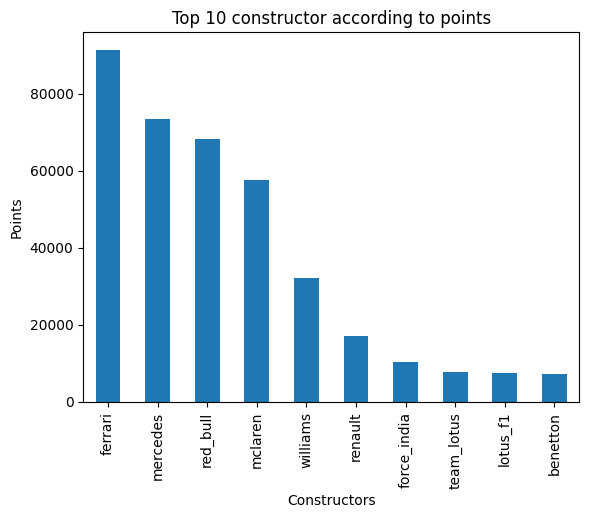

In [86]:
# prompt: find the top 10 constructorRef by total of points

import matplotlib.pyplot as plt
constructor_perf.groupby('constructorRef')['points'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 constructor according to points')
plt.xlabel('Constructors')
plt.ylabel('Points')
print("Top ten constructors")
constructor_perf.groupby('constructorRef')['points'].sum().sort_values(ascending=False).head(10)


Ferrari has been around since the start of Formula 1 historically

Text(0, 0.5, 'Wins')

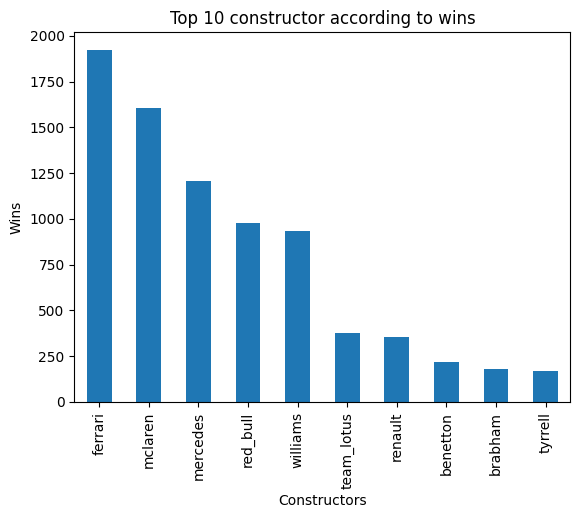

In [93]:
# prompt: in constructor_perf find top ten constructorRef total number of wins and plot it

import matplotlib.pyplot as plt
constructor_perf.groupby('constructorRef')['wins'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 constructor according to wins')
plt.xlabel('Constructors')
plt.ylabel('Wins')
